In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import datetime
import scipy.stats as stats

#graphing
import matplotlib.pyplot as plt
#stats
import statsmodels.api as sm
from statsmodels.base.model import GenericLikelihoodModel
from sklearn.mixture import GaussianMixture 
#import testing
import sys
sys.path.append("../")
import selection_tests

import itertools

In [2]:
data = pd.read_stata("all_plans_c_bonus.dta")
data['log_enroll'] = np.log(data['enr_c'])
data['enr_total'] = data['enr_c'] + data['enr_FFS']

#create a variable that is just db 
treat = data[['ssa', 'state', 'county', 'double_bonus']].copy()
treat = treat.groupby(['ssa', 'state', 'county'],as_index=False).max()
treat = treat.rename(columns={'double_bonus':'treatment' })
print(treat)
print(data.shape)
data = data.merge(treat, on=['ssa', 'state', 'county'],how='left')
print(data.shape)
print(data[data['year'] == 2016]['treatment'].mean())
print(data[ data['year'] == 2016 ]['double_bonus'].mean())
print(data[ data['year'] == 2012 ]['double_bonus'].mean())
print(data[data['year']==2006]['treatment'].max())
print(data[data['year']==2012]['treatment'].max())

        ssa state      county  treatment
0      1000    AL     Autauga          1
1      1010    AL     Baldwin          1
2      1020    AL     Barbour          0
3      1030    AL        Bibb          1
4      1040    AL      Blount          1
...     ...   ...         ...        ...
2966  53180    WY  Sweetwater          0
2967  53190    WY       Teton          0
2968  53200    WY       Uinta          0
2969  53210    WY    Washakie          0
2970  53220    WY      Weston          0

[2971 rows x 4 columns]
(32702, 82)
(32702, 83)
0.09527410207939509
0.0892249527410208
0.07532281205164992
1
1


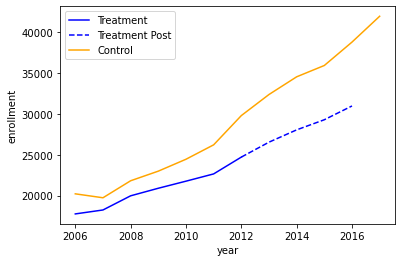

In [9]:
def create_plot_y(df):
    df = df.copy()
    df['y'] = df['enr_c']*df['enr_total']
    df_group = df.groupby('year',as_index=False).sum()
    df_group['y'] = df_group['y']/df_group['enr_total']
    return df_group.copy()



data_treat_pre = data[(data['treatment']==1) & (data['year'] <= 2012) &
                          (data['year'] >= 2006) ][['enr_c','year','enr_total']]
data_treat_pre =  create_plot_y(data_treat_pre)
plt.plot(data_treat_pre['year'],data_treat_pre['y'],label='Treatment',color='blue')


data_treat_post = data[(data['treatment']==1) & (data['year'] >= 2012) &
                          (data['year'] <= 2016) ][['enr_c','year','enr_total']]
data_treat_post =  create_plot_y(data_treat_post)
plt.plot(data_treat_post['year'],data_treat_post['y'],label='Treatment Post',color='blue',linestyle='--')



data_control  = data[data['treatment']==0 & (data['year'] <= 2016) &
                          (data['year'] >= 2006) ][['enr_c','year','enr_total']]
data_control =  create_plot_y(data_control)
plt.plot(data_control['year'],data_control['y'],label='Control',color='orange')



data_treat_cf = data_control[ (data_control['year']>=2012) & (data_control['year']<=2016)] - data
plt.plot(data_treat_cf['year'],data_treat_cf['y'],label='Treatment Post',color='blue',linestyle='--')

plt.xlabel('year')
plt.ylabel('enrollment')
plt.legend()
plt.savefig('pre-trends_double_bonus',dpi=300)


plt.show()